## Entity Recognition and Classification 

Extracting information from text and classify them into named entities in pre-defined categories is what entails in entity recognition

Importing Libraries

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import pickle 

from wordcloud import WordCloud

### The Dataset

The Different Attributes in the dataset are: 
- id : text 
- Artist : text 
- Album : text 
- Decade : text 
- Sales_total : number 
- Sales_US : number
- <b>Description : Text</b>

In [4]:
dataframe = pd.read_csv('../data/preprocessed.csv') 
dataframe.head(3)

,id,artist,album,decade,sales_total,sales_us,description,author
0,25-the-beatles-sgt-pepper-s-lonely-hearts-club...,The Beatles,Sgt. Pepper’s Lonely Hearts Club Band,60s,1800000,1100000,decade defined sweeping cultural paradigm shif...,Max Blau
1,24-pink-floyd-the-wall,Pink Floyd,The Wall,70s,1800000,1100000,legacy pink floyd cemented dark side moon . wa...,Clint Alwahab
2,23-michael-jackson-bad,Michael Jackson,Bad,80s,1900000,1000000,bizarre consider album five consecutive number...,Josh Jackson


### Capturing the Entity Classes and Entity Mentions 

Using spaCy, the descriptions are analysed for identifying entity classes and entity mentions. While the label_ attribute of the SpaCy embeddings give the name of the class of entity observed, the text attribute gives the value of the entity mentioned. 


In [5]:
'''
Capturing descriptions and extracting entity classes and entity mentions 
'''

description = list(dataframe['description'])
list_of_entities = []
entity_mentions, entity_class = [], [] 

for every_description in description: 
    doc = nlp(every_description)
    entities = []
    if doc.ents:
        for entity in doc.ents:
            entity_mentions.append(entity.text)
            entity_class.append(entity.label_)
            entities.append((entity.text, entity.label_))

    list_of_entities.append(entities)



### Word Cloud of Entity Classes Identified from the Dataset

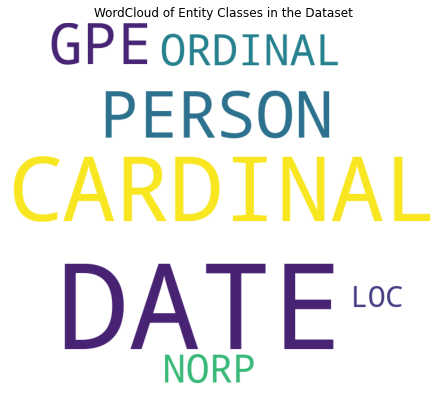

In [6]:
entity_class_words= " ".join(entity_class)+" "

wordcloud = WordCloud(width = 700, height = 600,
                background_color ='white',
                min_font_size = 5).generate(entity_class_words)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('WordCloud of Entity Classes in the Dataset')
plt.show()
 

### Finding the top 5 most frequent entity classes

In [7]:
def find_frequency(word_list):
    '''
    Function to find the frequency of words in a tokenized list of words
    '''
    unique_words = set(word_list)
    word_frequency_occurance = {}
    for word in unique_words:
        word_frequency_occurance[word] = word_list.count(word)
    return sorted(word_frequency_occurance.items(), key=lambda item: item[1])
    

In [8]:
frequency_entity_classes = find_frequency(entity_class)
print("The top 5 frequently occuring entity classes are:  ")
for i in range(len(frequency_entity_classes)-1, len(frequency_entity_classes)-6, -1): print(frequency_entity_classes[i][0], ': ', frequency_entity_classes[i][1], ' times')


The top 5 frequently occuring entity classes are:  
DATE :  30  times
CARDINAL :  29  times
PERSON :  13  times
GPE :  10  times
ORDINAL :  5  times


> As observed from above, <b>DATE</b> is the most frequently occuring entity class within the dataset as observed by spacy with <b>30 entity mentions</b> in this category. 

### Word Cloud of Entity Mentions identified in the dataset

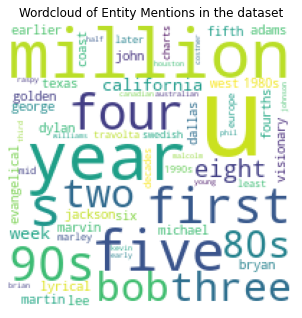

In [9]:
entity_mentions_words= " ".join(entity_mentions)+" "

wordcloud = WordCloud(width = 200, height = 200,
                background_color ='white',
                min_font_size = 5).generate(entity_mentions_words)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Wordcloud of Entity Mentions in the dataset')
plt.show()

### Finding the top 10 most frequent Entity Mentions

In [10]:
frequency_entity_mentions = find_frequency(entity_mentions)
print("The top 10 frequently occuring entity mentions are:  ")
counter = len(frequency_entity_mentions)-1 
for i in range(0,10):
    print(frequency_entity_mentions[counter][0], ': ', frequency_entity_mentions[counter][1], ' times')
    counter-=1

    

The top 10 frequently occuring entity mentions are:  
five :  3  times
u.s. :  3  times
first :  3  times
80s :  2  times
california :  2  times
90s :  2  times
24 million :  2  times
four :  2  times
u.k. :  2  times
1 :  2  times


> The top most frequently occuring entity mention is <b>'first'</b> with a total of <b>3</b> mentions. 

Storing the entity mentions and entity classes along with descriptions for further processing as pickle files

The entity mentions and entity classes are stored as values with descriptions as keys in a dictionary. 


In [11]:
entity_dictionary = dict(zip(description,list_of_entities))
with open('../data/entity_dictionary.pickle', 'wb') as file:
    pickle.dump(entity_dictionary,  file)

